# BY ABHISHEK THAPA 

## @Data Science Intern- TSFGRIP-NOVEMBER2022

## `TASK-02:` Prediction using Supervised ML
### `Level-` Beginner
### `Dataset:`  http://bit.ly/w-data

### `github:` https://github.com/Abhishek004-thapa
### `linkedin:` https://www.linkedin.com/in/abhishek-thapa-b9a733199/

# `STEP-1:` Importing required important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# `STEP-2:` Loading Dataset

In [2]:
data_url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(data_url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# `STEP-3:` Exploratory Data Analysis and Visualization.

## `Exploring and Analysing Data:`

Let's see the shape, info and statistical distribution of our loaded datasets...

In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let's check for missing and duplicated values/tuples in our datasets.

In [6]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.nunique()

Hours     23
Scores    23
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

All features are of numeric type, so no need of encoding of features for this  dataset.

## `Visualization:`

###  `Scatter Plot`

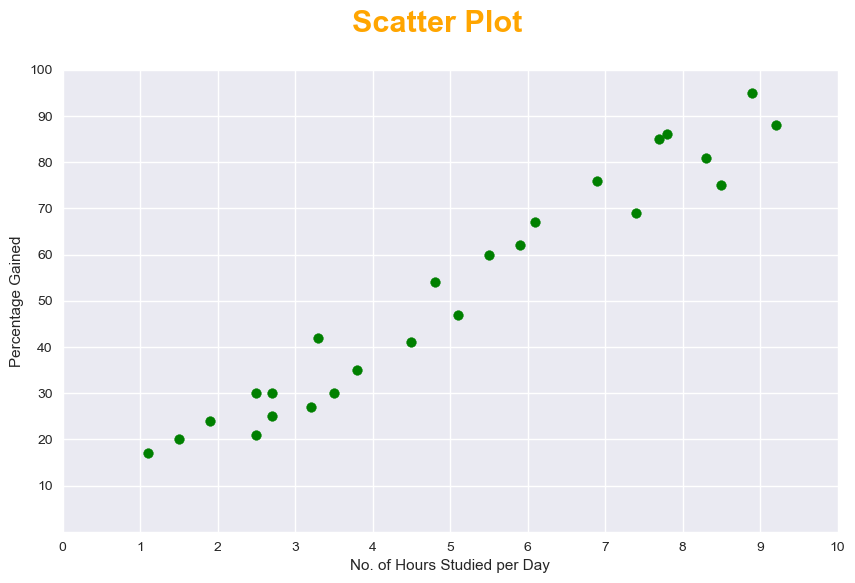

In [10]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=df["Hours"], y=df["Scores"], c="green")
ax.set(xlabel="No. of Hours Studied per Day",
       ylabel="Percentage Gained",
       xlim=(0, 10),
       ylim=(0, 100),
       xticks=range(0, 11),
       yticks=(range(0, 110, 10)))
ax.yaxis.get_major_ticks()[0].label1.set_visible(False)
fig.suptitle(t="Scatter Plot",
             c="orange",
             fontsize=22,
             fontweight="bold");

`X` and `y` are directly proportional to each other as with the increase in X, y increases and vice-versa

# `STEP-4:` Data Spliting  & Model Fitting

For model fitting, the shape of X features must be of `(M, N) where N >= 1` whereas y i.e target feature of `(M,)`.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [12]:
X = df.drop("Scores", axis=1)
y = df["Scores"]

In [13]:
X.shape

(25, 1)

In [14]:
y.shape

(25,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### `Random Forest Regressor`

In [16]:
rf = RandomForestRegressor(n_estimators=100) # By default, n_estimators=100
rf.fit(X_train, y_train)
rf_train_score = rf.score(X_train, y_train)
print(f"Model Accuracy on Training datasets: {rf_train_score*100:.4f}%")

Model Accuracy on Training datasets: 98.9590%


`n_estimators`:

> This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower

In [17]:
rf_test_score = rf.score(X_test, y_test)
print(f"Model Accuracy on Test datasets: {rf_test_score*100:.4f}%")

Model Accuracy on Test datasets: 80.9207%


### `Linear Regression`

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_train_score = lr.score(X_train, y_train)
print(f"Model Accuracy on Training datasets: {lr_train_score*100:.4f}%")

Model Accuracy on Training datasets: 95.1551%


In [19]:
lr_test_score = lr.score(X_test, y_test)
print(f"Model Accuracy on Test datasets: {rf_test_score*100:.4f}%")

Model Accuracy on Test datasets: 80.9207%


#### Comparing Actual vs Predicted of Two Models on Test Data.

In [20]:
lr_y_preds = lr.predict(X_test)
rf_y_preds = rf.predict(X_test)
vs_df = pd.DataFrame({'Hours': X_test['Hours'], 'Actual': y_test, 'LR_Predicted': lr_y_preds, 'RF_Predicted': rf_y_preds})  
vs_df 

,Hours,Actual,LR_Predicted,RF_Predicted
5,1.5,20,16.884145,19.758333
2,3.2,27,33.732261,37.760000
19,7.4,69,75.357018,83.990000
16,2.5,30,26.794801,23.895833
11,5.9,62,60.491033,62.450000


### `Ploting Regression Line on Scatter Plot:`

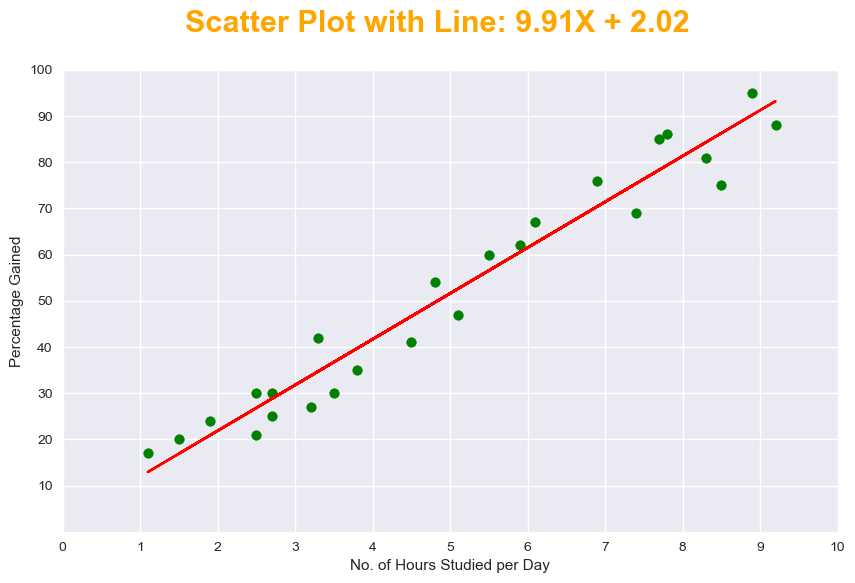

In [21]:
line = lr.coef_*X+lr.intercept_
m = lr.coef_[0]
c= lr.intercept_
line_eqn = f"{m:.2f}X + {c:.2f}"

plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=df["Hours"], y=df["Scores"], c="green")
ax.set(xlabel="No. of Hours Studied per Day",
       ylabel="Percentage Gained",
       xlim=(0, 10),
       ylim=(0, 100),
       xticks=range(0, 11),
       yticks=(range(0, 110, 10)))
ax.yaxis.get_major_ticks()[0].label1.set_visible(False)
plt.plot(X, line, c="red")
fig.suptitle(t=f"Scatter Plot with Line: {line_eqn}",
             c="orange",
             fontsize=22,
             fontweight="bold");



### `Predicted vs Actual of RandomForestRegressor Model on Train Data.`

Red : `Predicted`

Green: `Actual`

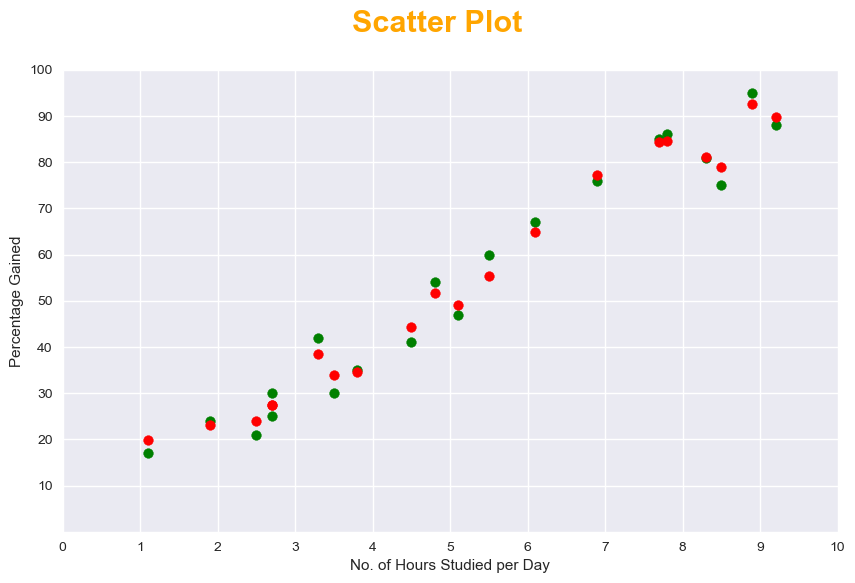

In [22]:
plt.style.use("seaborn")
y_preds = rf.predict(X_train)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=X_train, y=y_train, c="green")
ax.set(xlabel="No. of Hours Studied per Day",
       ylabel="Percentage Gained",
       xlim=(0, 10),
       ylim=(0, 100),
       xticks=range(0, 11),
       yticks=(range(0, 110, 10)))
ax.yaxis.get_major_ticks()[0].label1.set_visible(False)
ax.scatter(x=X_train, y=y_preds, c="red")
fig.suptitle(t="Scatter Plot",
             c="orange",
             fontsize=22,
             fontweight="bold");

# `STEP-5:` Making Prediction on Unseen Data

In [23]:
hours = pd.DataFrame([9.25], columns=["Hours"])
lr_score_preds = lr.predict(hours)
print(f"LR_Model Predicted % for 9.75 Hours: {lr_score_preds[0]:.4f}%")

LR_Model Predicted % for 9.75 Hours: 93.6917%


In [24]:
rf_score_preds = rf.predict(hours)
print(f"RF_Model Predicted % for 9.75 Hours: {rf_score_preds[0]:.4f}%")

RF_Model Predicted % for 9.75 Hours: 89.7300%


# `STEP-6:` Model Evaluation

As this is Regression problems, we can't use `Classification Report, Confusion Matrix & Accuracy Score Metrics` for Model Evaluation. So, we are using 
>`Mean Absolute Error`

In [25]:
from sklearn.metrics import mean_absolute_error

### `Mean Absolute Error:`

In [26]:
rf_y_preds = rf.predict(X_test)
lr_y_preds = lr.predict(X_test)
print(f"RF_Mean Absolute Error: {mean_absolute_error(y_test, rf_y_preds)}\n")
print(f"LR_Mean Absolute Error: {mean_absolute_error(y_test, lr_y_preds)}")

RF_Mean Absolute Error: 6.509166666666667

LR_Mean Absolute Error: 4.183859899002982


## `NOTE:` Low Accuracy and High Error is because of less number of tuples in our datasets.

 >>> # THANK YOU !!!